# Univariate Data Analysis

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline  

## Read the dataset 

In [8]:
df = pd.read_csv("nhanes_2015_2016.csv")
print(df.head)     # View the first few rows
print(df.dtypes)   # View datatypes of the columns
print(df.shape)    # To get the total number of rows and columns in the dataset  [5735 x 28]

<bound method NDFrame.head of        SEQN  ALQ101  ALQ110  ALQ130  SMQ020  RIAGENDR  RIDAGEYR  RIDRETH1  \
0     83732     1.0     NaN     1.0       1         1        62         3   
1     83733     1.0     NaN     6.0       1         1        53         3   
2     83734     1.0     NaN     NaN       1         1        78         3   
3     83735     2.0     1.0     1.0       2         2        56         3   
4     83736     2.0     1.0     1.0       2         2        42         4   
5     83737     2.0     2.0     NaN       2         2        72         1   
6     83741     1.0     NaN     8.0       1         1        22         4   
7     83742     1.0     NaN     1.0       2         2        32         1   
8     83743     NaN     NaN     NaN       2         1        18         5   
9     83744     1.0     NaN     NaN       2         1        56         4   
10    83747     1.0     NaN     1.0       1         1        46         3   
11    83750     1.0     NaN     3.0       1   

## Frequency Tables

In [11]:
# Here we focus on the variable: DMDEDUC2 - which reflects the persons level of educational attainment. 
# The variable has the following mapping: 
# 1	Less than 9th grade
# 2	9-11th grade (Includes 12th grade with no diploma)
# 3	High school graduate/GED or equivalent
# 4	Some college or AA degree
# 5	College graduate or above
# 7	Refused
# 9	Don't Know
# .	Missing

# For frequency count, We will use the pandas method value_counts()  which returns a data frame comprising of 2 columns: 
# [1] Distinct observed values of the variable
# [2] Count of each of this distinct variables. 
print(df.DMDEDUC2.value_counts())

# Note: The value_counts() eliminates the missing values. We can prove it. We know that the total row in dataset: 5735
# If the sum of all the frequencies should be 5735,if not...value_counts() skipped the missing values. 
# Proof [1]
print(df.DMDEDUC2.value_counts().sum())   # 5474...this means that there are 5735 - 5474 = 261 missing values. 

# Proof [2]
print(pd.isnull(df.DMDEDUC2).sum())       # 261 missing values. 


4.0    1621
5.0    1366
3.0    1186
1.0     655
2.0     643
9.0       3
Name: DMDEDUC2, dtype: int64
5474
261


# Verbose Frequency Table

In [15]:
# The column DMDEDUC2 has an innate mappping, which is explained in the documentation. Thus the frequency table, isnt that intuitive. 
# Reference: https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2
# We can eliminate this issue by creating a new column which explains the mappings and then run a frequency count. 
# Original column: DMDEDUC2
# New column: DMDEDUC2x
df["DMDEDUC2x"] = df.DMDEDUC2.replace({1:"<9", 2:"9-11", 3:"HS/GED", 4:"Some College/AA", 5:"College Graduate", 7:"Refused", 
                                       9:"Dont Know"})
print(df.DMDEDUC2x.value_counts())

print("+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-")
# Similarly consider the mapping for the variable "RIAGENDR". 
# This variable represents the gender of the participant, with the mapping of Male-1 and Female-0
# Reference: https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR
# Lets create a new column with intuitive mapping
df["RIAGENDRx"] = df.RIAGENDR.replace({1:'Male', 2:'Female'})
print(df.RIAGENDRx.value_counts())

Some College/AA     1621
College Graduate    1366
HS/GED              1186
<9                   655
9-11                 643
Dont Know              3
Name: DMDEDUC2x, dtype: int64
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
Female    2976
Male      2759
Name: RIAGENDRx, dtype: int64


# Proportions Table
## In many situations we are interested to determine the proportion in each category, rather than knowing the mere frequencies. 

In [20]:
freq = df.DMDEDUC2x.value_counts()
prop = freq/freq.sum()
print("Propertion of people in each level of educational attainment:---->\n\n", prop)

Propertion of people in each level of educational attainment:---->

 Some College/AA     0.296127
College Graduate    0.249543
HS/GED              0.216661
<9                  0.119657
9-11                0.117464
Dont Know           0.000548
Name: DMDEDUC2x, dtype: float64


# Numerical Summaries
## Here we use the describe() of the pandas data frame. 

In [27]:
# Lets say we are interested in determining the summary statistics of the numeric variable- "BMXWT" - Refers to body weight in kg.
# Reference: https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXWT
# First determine the number of missing values in this column
pd.isnull(df.BMXWT).sum()   # 69

# Determine the summary stats after excluding the missing values 
# Summary stats is a 5 point summary. 
df.BMXWT.dropna().describe()

# We can also compute summary stats individually using methods from 'pandas' and 'numpy' library
x = df.BMXWT.dropna()    # Extract all non-missing values of BMXWT into a variable called 'x'
# [1] MEAN
print(x.mean())                # Pandas method
print(np.mean(x))              # Numpy method 

# [2] MEDIAN
print(x.median())              # Pandas method
print(np.percentile(x, 50))    # Numpy method (50th percentile == Median)

# [3] 75th PERCENTILE
print(x.quantile(0.75))        # Pandas Method
print(np.percentile(x, 75))    # Numpy method


81.34267560889509
81.34267560889509
78.2
78.2
92.7
92.7


# Compute Proportions
## Consider the variable: BPXSY1. "BPX" refers to the blood pressure measurement. "SY" stands for systolic blood pressure (i.e. Blood Pressure at the peak of a heartbeat cycle). "1" indicates that this is first of the three systolic blood pressure measurements taken on a subject. 
## A person is generally considered to have pre-hypertension when their systolic blood pressure is in between 120-139 [OR] their diastolic blood pressure is in between 80 to  89. 
## Considering both the systolic and diastolic conditions, lets compute the PROPORTION of people who have pre-hypertension. 
## Reference: https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1

In [31]:
print(np.mean((df.BPXSY1 >= 120) & (df.BPXSY2 <= 139)))      # Compute proportions using Systolic Blood Pressure
                                                             # & == AND Logical operator

print(np.mean((df.BPXDI1 >= 80) & (df.BPXDI2 <= 89)))        # Compute proportions using Diastolic Blood Pressure


0.3741935483870968
0.14803836094158676


## Lets compute the proportion of NHANES subjects who are pre-hypertensive based on either systolic (or) diastolic pre-tensive status separately and then combine the results with a Logical OR to get the final status  of the subjects. 

In [35]:
a = (df.BPXSY1 >= 120) & (df.BPXSY2 <= 139)               # You get a matrix of True and False
b = (df.BPXDI1 >= 80) & (df.BPXDI2 <= 89)
print(np.mean(a|b))                                       # 0.43975588491717527...Proportion of subjects with pre-hypertension.

0.43975588491717527


# Lets compute the "White Coat Anxiety" factor. 
## Blood pressure measurements are affected by a phenomenon called "white coat anxiety", in which a subject's bood pressure may be slightly elevated if they are nervous when interacting with health care providers. Typically this effect subsides if the blood pressure is measured several times in sequence. In NHANES, both systolic and diastolic blood pressure are meausred three times for each subject (e.g. BPXSY2 is the second measurement of systolic blood pressure). We can calculate the extent to which white coat anxiety is present in the NHANES data by looking a the mean difference between the first two systolic or diastolic blood pressure measurements.

In [36]:
print(np.mean(df.BPXSY1 - df.BPXSY2))
print(np.mean(df.BPXDI1 - df.BPXDI2))

0.6749860309182343
0.3490407897187558


# Graphical Summaries

## Lets observe the distribution of body weight (in Kg)

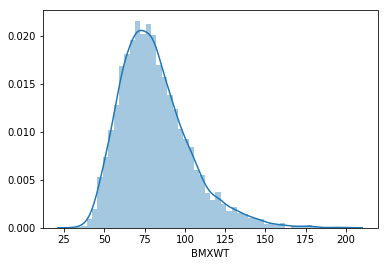

In [37]:
sns.distplot(df.BMXWT.dropna())
# Interpretation: The curve is unimodal + right skewed. 

## Lets observe the histogram for systolic blood pressure measurements 

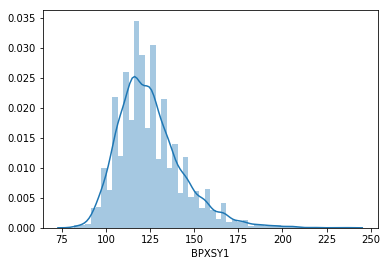

In [39]:
sns.distplot(df.BPXSY1.dropna())

# Stratification
## One of the most effective way to get more information about a dataset is to divide it into, smaller + more uniform subsets/ stratas and then analyze each of the strata on its own. When working with Human subjects, we can stratify on demographic factors such as age/ sex/ race. 
## To explain the concept of stratification, consider "blood pressure", which is a value that tends to increase with age. To analyze this trend, we can partition the data, into "age strata" and construct side-by-side boxplots for systolic blood pressure within each stratum. 
## Since age is a quantitative variable, we need to create a series of "bins" of similar systolic blood pressure values 

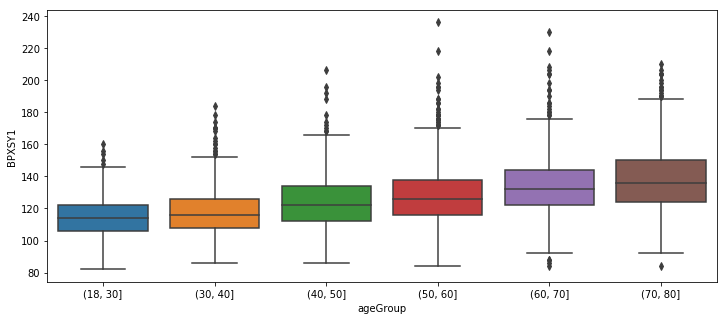

In [43]:
df["ageGroup"] = pd.cut(df.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])     # Create "Age Strata" based on the mentioned cut points
plt.figure(figsize=(12, 5))                                      # Specify the plot dimensions (12 cm wide + 5 cm wide)
sns.boxplot(x="ageGroup", y="BPXSY1", data=df)

## Now the blood pressure also depends upon the Gender of the subject. We can illustrate the constrast using 2 side-by-side boxplots. Since age does have a strong influence on the blood pressure of the subject, we will include it, in the analysis of the influence of gender on blood pressure. We therefore need to DOUBLE STRATIFY the data by gender and by age. 


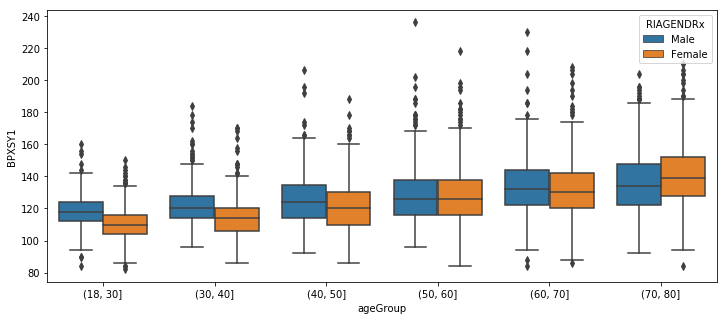

In [46]:
df["ageGroup"] = pd.cut(df.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])         # 
plt.figure(figsize=(12, 5))
sns.boxplot(x="ageGroup", y="BPXSY1", hue="RIAGENDRx", data=df)            # x,y,hue: Used to specify input (long form) data. 